You can download the `requirements.txt` for this course from the workspace of this lab. `File --> Open...`

# L2: Create Agents to Research and Write an Article

In this lesson, you will be introduced to the foundational concepts of multi-agent systems and get an overview of the crewAI framework.

The libraries are already installed in the classroom. If you're running this notebook on your own machine, you can install the following:
```Python
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29
```

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

- Import from the crewAI libray.

In [2]:
from crewai import Agent, Task, Crew

- As a LLM for your agents, you'll be using OpenAI's `gpt-3.5-turbo`.

**Optional Note:** crewAI also allow other popular models to be used as a LLM for your Agents. You can see some of the examples at the [bottom of the notebook](#1).

In [3]:
import os
from utils import get_openai_api_key

openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

## Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

### Agent: Planner

**Note**: The benefit of using _multiple strings_ :
```Python
varname = "line 1 of text"
          "line 2 of text"
```

versus the _triple quote docstring_:
```Python
varname = """line 1 of text
             line 2 of text
          """
```
is that it can avoid adding those whitespaces and newline characters, making it better formatted to be passed to the LLM.

In [4]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
	verbose=True
)

### Agent: Writer

In [5]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True
)

### Agent: Editor

In [6]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True
)

## Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

### Task: Plan

In [7]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

### Task: Write

In [8]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

### Task: Edit

In [9]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

## Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=2` allows you to see all the logs of the execution. 

In [10]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

verbose can vary from 1 to 2 in this case depending upon the number of users. And that will define how much verbosity you are going to see on your logs.

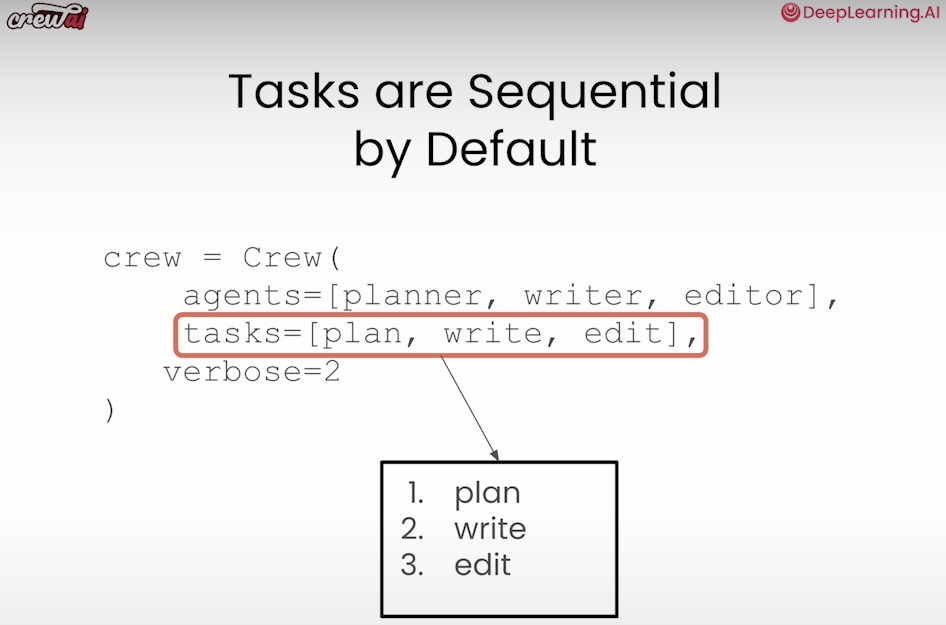

## Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

In [11]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer:
Title: The Rise of Artificial Intelligence: Latest Trends and Key Players

Introduction:
Artificial Intelligence (AI) has rapidly evolved in recent years, transforming various industries and revolutionizing the way we live and work. In this blog article, we will explore the latest trends and key players in the field of AI, providing valuable insights for both professionals and enthusiasts.

Key Points:
1. Latest Trends in Artificial Intelligence:
- Machine Learning: Advancements in machine learning algorithms 

I now can give a great answer

Final Answer:
# The Rise of Artificial Intelligence: Latest Trends and Key Players

## Introduction
Artificial Intelligence (AI) has become an integral part of our daily lives, shaping the way we interact with technology and revolutionizing various industries. In this blog article, we will delve into the latest trends and key players in the field of AI, offering valuable insights for professionals, enthusiasts, and anyone curious about the future of technology.

## Latest Trends in Artificial Intelligence
One of the most significant advancements in AI is the progress in machine learning algorithms. These algorithms have enabled AI systems to learn and improve from data without explicit programming, leading to more efficient and accurate decision-making processes. Natural Language Processing (NLP) is another key trend in AI, with technologies like chatbots and virtual assistants becoming increasingly sophisticated in understanding and generating human lang

- Display the results of your execution as markdown in the notebook.

In [12]:
from IPython.display import Markdown
Markdown(result)

# The Rise of Artificial Intelligence: Latest Trends and Key Players

## Introduction
Artificial Intelligence (AI) has become an integral part of our daily lives, shaping the way we interact with technology and revolutionizing various industries. In this blog article, we will delve into the latest trends and key players in the field of AI, offering valuable insights for professionals, enthusiasts, and anyone curious about the future of technology.

## Latest Trends in Artificial Intelligence
One of the most significant advancements in AI is the progress in machine learning algorithms. These algorithms have enabled AI systems to learn and improve from data without explicit programming, leading to more efficient and accurate decision-making processes. Natural Language Processing (NLP) is another key trend in AI, with technologies like chatbots and virtual assistants becoming increasingly sophisticated in understanding and generating human language. Additionally, AI applications in computer vision have made remarkable strides in image and video analysis, facilitating tasks such as facial recognition and object detection.

## Key Players in the AI Industry
Google, with its AI research division Google Brain, has been a pioneer in AI innovation. Projects like AlphaGo and BERT have showcased Google's commitment to pushing the boundaries of AI technology. Microsoft is another key player in the AI industry, investing heavily in cognitive services and AI-driven cloud solutions. IBM's Watson platform stands out as a leading AI system applied across various sectors, including healthcare and finance. These key players continue to drive innovation and shape the future of AI technology.

## Target Audience
Our target audience includes professionals in the tech industry, entrepreneurs seeking to leverage AI for business growth, and individuals interested in the evolving landscape of technology. They are eager to stay informed about the latest AI trends, understand the societal impact of AI, and explore career opportunities in the field. By providing valuable insights and updates on AI, we aim to engage and educate our audience while fostering a community of AI enthusiasts.

## Call to Action
For more in-depth insights on Artificial Intelligence and its applications, subscribe to our newsletter for regular updates on industry trends and expert opinions. Join our upcoming webinar on AI in business to discover how you can harness the power of AI for your organization and stay ahead in the rapidly evolving tech landscape.

In conclusion, Artificial Intelligence continues to shape the future of technology, with key trends like machine learning and NLP driving innovation across industries. Key players like Google, Microsoft, and IBM are leading the charge in AI research and development, paving the way for a more intelligent and connected world. Stay informed, stay curious, and embrace the transformative power of AI in our society.

*SEO Keywords: Artificial Intelligence trends, Key players in AI, Latest developments in AI, AI industry insights, Machine learning advancements*

## Try it Yourself

- Pass in a topic of your choice and see what the agents come up with!

In [15]:
topic = "Cart Festival"
result = crew.kickoff(inputs={"topic": topic})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Cart Festival.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer: 

Content Plan: Cart Festival

Introduction:
- Brief overview of Cart Festival and its significance in different cultures
- Explanation of the history and traditions associated with Cart Festival
- Mention of key players and notable events related to Cart Festival

Key Points:
1. Latest Trends:
- Incorporation of modern technology and social media in Cart Festival celebrations
- Increasing global awareness and participation in Cart Festival events
- Innovation in cart designs and decorations

2. Key Players:
- Local com

I now can give a great answer

Final Answer: 

# The Vibrant World of Cart Festivals

**Introduction:**

Cart Festivals hold a special place in various cultures around the world, serving as a time-honored tradition that brings communities together in celebration. These festivals are steeped in history and tradition, with each event showcasing unique customs and rituals that have been passed down through generations. From the elaborate displays of decorated carts to the lively music and dance performances, Cart Festivals offer a glimpse into the rich cultural heritage of different regions.

**Latest Trends:**

In recent years, Cart Festivals have seen a modern twist with the incorporation of technology and social media into the celebrations. Event organizers are using platforms like Instagram and Facebook to promote their festivals and attract a global audience. This increased visibility has led to a surge in awareness and participation in Cart Festival events, with people from all corn

In [16]:
Markdown(result)

# The Vibrant World of Cart Festivals

**Introduction:**

Cart Festivals hold a special place in various cultures around the world, serving as a time-honored tradition that brings communities together in celebration. These festivals are steeped in history and tradition, with each event showcasing unique customs and rituals that have been passed down through generations. From the elaborate displays of decorated carts to the lively music and dance performances, Cart Festivals offer a glimpse into the rich cultural heritage of different regions.

**Latest Trends:**

In recent years, Cart Festivals have seen a modern twist with the incorporation of technology and social media into the celebrations. Event organizers are using platforms like Instagram and Facebook to promote their festivals and attract a global audience. This increased visibility has led to a surge in awareness and participation in Cart Festival events, with people from all corners of the world coming together to experience these unique cultural celebrations. Additionally, there has been a wave of innovation in cart designs and decorations, with artists and designers pushing the boundaries to create visually stunning displays that capture the essence of the festival.

**Key Players:**

Local communities and organizations play a crucial role in organizing Cart Festival events, working tirelessly to ensure that the traditions and customs are upheld. Artists and designers also contribute to the festivities by creating one-of-a-kind carts and displays that showcase their creativity and craftsmanship. Government bodies and tourism boards have recognized the cultural significance of Cart Festivals and are actively promoting them as a cultural attraction to both locals and tourists.

**Noteworthy News:**

There have been inspiring stories of communities revitalizing Cart Festival traditions, breathing new life into age-old customs and attracting a new generation of participants. The impact of Cart Festivals on local economies and tourism cannot be understated, with these events bringing in revenue and boosting the cultural heritage of the region. However, organizers also face challenges in preserving and promoting Cart Festival heritage, as changing societal norms and economic pressures can threaten the authenticity of these traditions.

In conclusion, Cart Festivals offer a unique opportunity to experience the beauty and diversity of cultural celebrations from around the world. By embracing modern trends, honoring key players, and sharing noteworthy news, these festivals continue to thrive and captivate audiences globally. Let's celebrate the vibrant world of Cart Festivals and cherish the traditions that make them truly special.

Remember to join in the festivities and share your own Cart Festival experiences on social media using the designated hashtags. Explore the resources provided for further reading on Cart Festival traditions and events, and immerse yourself in the magic of these cultural celebrations.

<a name='1'></a>
 ## Other Popular Models as LLM for your Agents

#### Hugging Face (HuggingFaceHub endpoint)

```Python
from langchain_community.llms import HuggingFaceHub

llm = HuggingFaceHub(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    huggingfacehub_api_token="<HF_TOKEN_HERE>",
    task="text-generation",
)

### you will pass "llm" to your agent function
```

#### Mistral API

```Python
OPENAI_API_KEY=your-mistral-api-key
OPENAI_API_BASE=https://api.mistral.ai/v1
OPENAI_MODEL_NAME="mistral-small"
```

#### Cohere

```Python
from langchain_community.chat_models import ChatCohere
# Initialize language model
os.environ["COHERE_API_KEY"] = "your-cohere-api-key"
llm = ChatCohere()

### you will pass "llm" to your agent function
```

### For using Llama locally with Ollama and more, checkout the crewAI documentation on [Connecting to any LLM](https://docs.crewai.com/how-to/LLM-Connections/).

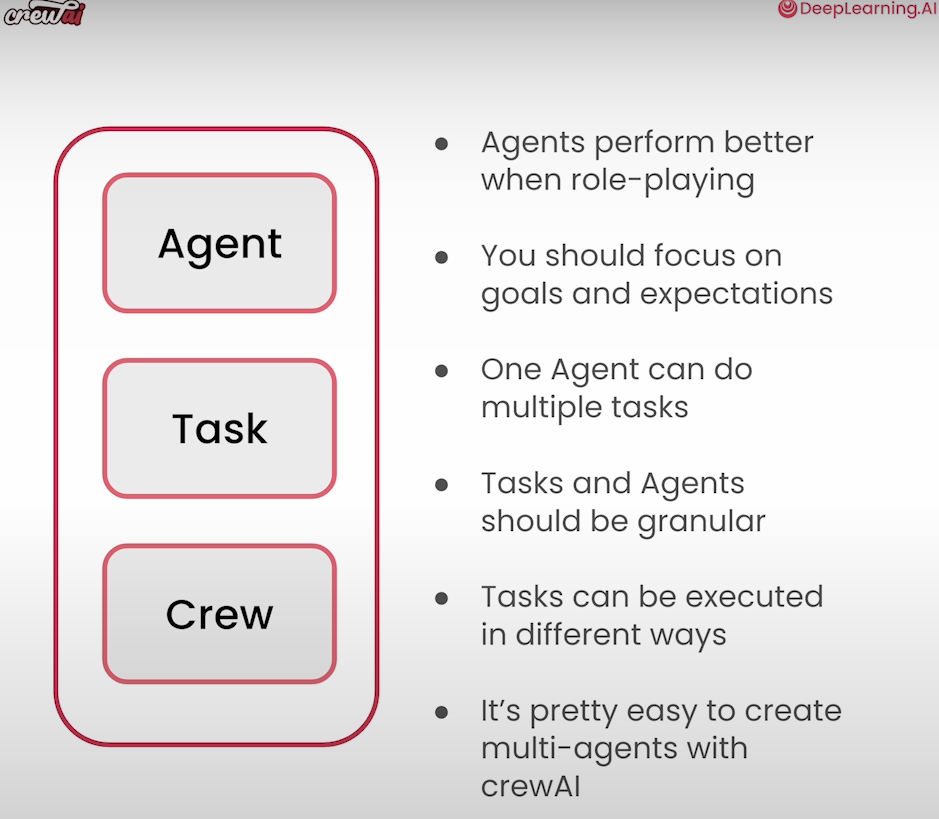